In [372]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [373]:
data=pd.read_excel('淮安.xlsx')

In [374]:
print(data.shape)
#data.head()

(4415, 17)


In [375]:
data.isna().sum()

编号            0
用途            0
区县            0
宗地名称          0
宗地位置          0
出让年限        776
交易方式          0
成交价格(万元)    309
成交年份          0
成交年月          0
成交时间          0
出让面积          0
容积率         288
建筑面积          0
受让单位         13
约定开工时间        0
约定竣工时间        0
dtype: int64

In [266]:
#data['用途'].value_counts()

# 工业：工业用地   仓储用地

# 公建：其他商服用地,公共设施用地,科教用地,批发零售用地,商务金融用地,公用设施用地,教育用地,医卫慈善用地,机关团体用地,文体娱乐用地,
#       零售商业用地,宗教用地,文化设施用地,科研用地,娱乐用地,旅馆用地,餐饮用地,医疗卫生用地,殡葬用地,社会福利用地,
#        监教场所用地,交通服务场站用地,军事设施用地,批发市场用地,住宿餐饮用地,体育用地 

# 住宅：中低价位、中小套型普通商品住房用地,城镇住宅用地,其他普通商品住房用地,经济适用住房用地,廉租住房用地,公共租赁住房用地 

In [267]:
# 工业
data.loc[data['用途']=='仓储用地','用途']='工业'
data.loc[data['用途']=='工业用地','用途']='工业'

In [268]:
data.loc[data['用途']=='中低价位、中小套型普通商品住房用地','用途']='住宅'
data.loc[data['用途']=='城镇住宅用地','用途']='住宅'
data.loc[data['用途']=='其他普通商品住房用地','用途']='住宅'
data.loc[data['用途']=='经济适用住房用地','用途']='住宅'
data.loc[data['用途']=='廉租住房用地','用途']='住宅'
data.loc[data['用途']=='公共租赁住房用地','用途']='住宅'

In [269]:
data.loc[data['用途']=='其他商服用地','用途']='公建'
data.loc[data['用途']=='公共设施用地','用途']='公建'
data.loc[data['用途']=='科教用地','用途']='公建'
data.loc[data['用途']=='批发零售用地','用途']='公建'
data.loc[data['用途']=='商务金融用地','用途']='公建'
data.loc[data['用途']=='公用设施用地','用途']='公建'
data.loc[data['用途']=='教育用地','用途']='公建'
data.loc[data['用途']=='医卫慈善用地','用途']='公建'
data.loc[data['用途']=='机关团体用地','用途']='公建'
data.loc[data['用途']=='文体娱乐用地','用途']='公建'
data.loc[data['用途']=='零售商业用地','用途']='公建'
data.loc[data['用途']=='宗教用地','用途']='公建'
data.loc[data['用途']=='文化设施用地','用途']='公建'
data.loc[data['用途']=='科研用地','用途']='公建'
data.loc[data['用途']=='娱乐用地','用途']='公建'
data.loc[data['用途']=='旅馆用地','用途']='公建'
data.loc[data['用途']=='餐饮用地','用途']='公建'
data.loc[data['用途']=='医疗卫生用地','用途']='公建'
data.loc[data['用途']=='殡葬用地','用途']='公建'
data.loc[data['用途']=='社会福利用地','用途']='公建'
data.loc[data['用途']=='监教场所用地','用途']='公建'
data.loc[data['用途']=='交通服务场站用地','用途']='公建'
data.loc[data['用途']=='军事设施用地','用途']='公建'
data.loc[data['用途']=='批发市场用地','用途']='公建'
data.loc[data['用途']=='住宿餐饮用地','用途']='公建'
data.loc[data['用途']=='体育用地','用途']='公建'

In [270]:
data.loc[data['用途']=='公园与绿地','用途']='others'
data.loc[data['用途']=='公路用地','用途']='others'
data.loc[data['用途']=='街巷用地','用途']='others'
data.loc[data['用途']=='城镇村道路用地','用途']='others'
data.loc[data['用途']=='港口码头用地','用途']='others'
data.loc[data['用途']=='水工建筑用地','用途']='others'
data.loc[data['用途']=='机场用地','用途']='others'
data.loc[data['用途']=='铁路用地','用途']='others'

In [271]:
data['用途'].value_counts()

住宅        1741
工业        1345
公建        1028
others     301
Name: 用途, dtype: int64

In [272]:
data.head()

,编号,用途,区县,宗地名称,宗地位置,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,受让单位,约定开工时间,约定竣工时间
0,32,住宅,楚州区,漕运镇谢庄社区项目（淮安市宏信国和资产投资管理有限公司）50.685亩,淮安市淮安区漕运镇兴业路东侧、幸福路北侧,70,挂牌,4080.0,2020年,2020-05-01,2020-05-22,33790.0,1.8,60822.0,淮安市宏信国有资产投资管理有限公司,2021-06-30,2023-06-30
1,33,住宅,楚州区,漕运镇沙口社区（淮安宏信国有资产投资管理有限公司）46.272亩,淮安市淮安区漕运镇沙口村富民路南侧、康安路东侧。,70,挂牌,3720.0,2020年,2020-05-01,2020-05-22,30848.0,1.8,55526.4,淮安市宏信国有资产投资管理有限公司,2021-06-30,2023-06-30
2,34,住宅,楚州区,淮安区石塘镇集中居住富民佳苑项目(淮安市宏信国有资产投资管理有限公司)167.0145亩,淮安市淮安区石塘镇花园路东侧、石塘大道北侧。,70,挂牌,13570.0,2020年,2020-05-01,2020-05-22,111343.0,1.8,200417.4,淮安市宏信国有资产投资管理有限公司,2021-06-30,2023-06-30
3,35,住宅,楚州区,朱桥镇集中居住康居雅苑项目(淮安市宏信国有资产投资管理有限公司)38.838亩,淮安市淮安区朱桥镇淮流路北侧、朱季路东侧。,70,挂牌,3120.0,2020年,2020-05-01,2020-05-22,25892.0,1.8,46605.6,淮安市宏信国有资产投资管理有限公司,2021-06-30,2023-06-30
4,41,公建,楚州区,石塘镇建淮党群服务中心,淮安市淮安区石塘镇纬二路南侧、安康路西侧。,NaN,划拨,NaN,2020年,2020-05-01,2020-05-18,2783.0,1.0,2783.0,淮安市淮安区石塘镇人民政府,2020-12-30,2022-12-30


In [273]:
data=data.drop(['宗地名称', '宗地位置','受让单位'], axis=1)
print(data.shape)
data.head()

(4415, 14)


,编号,用途,区县,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,约定开工时间,约定竣工时间
0,32,住宅,楚州区,70,挂牌,4080.0,2020年,2020-05-01,2020-05-22,33790.0,1.8,60822.0,2021-06-30,2023-06-30
1,33,住宅,楚州区,70,挂牌,3720.0,2020年,2020-05-01,2020-05-22,30848.0,1.8,55526.4,2021-06-30,2023-06-30
2,34,住宅,楚州区,70,挂牌,13570.0,2020年,2020-05-01,2020-05-22,111343.0,1.8,200417.4,2021-06-30,2023-06-30
3,35,住宅,楚州区,70,挂牌,3120.0,2020年,2020-05-01,2020-05-22,25892.0,1.8,46605.6,2021-06-30,2023-06-30
4,41,公建,楚州区,NaN,划拨,NaN,2020年,2020-05-01,2020-05-18,2783.0,1.0,2783.0,2020-12-30,2022-12-30


#### 统计住宅、工业、公建三种土地总数

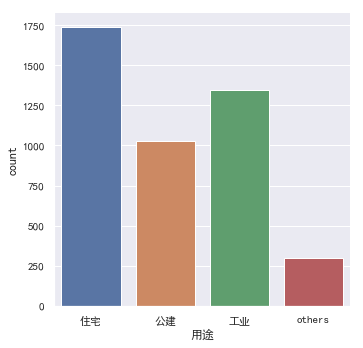

In [274]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

#sns.set_style("white")
sns.factorplot('用途',data=data,kind="count")
#plt.savefig('train_age.jpg')

In [275]:
data['用途'].value_counts()

住宅        1741
工业        1345
公建        1028
others     301
Name: 用途, dtype: int64

#### 统计区县和土地用途之间的关系

In [276]:
data.head()

,编号,用途,区县,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,约定开工时间,约定竣工时间
0,32,住宅,楚州区,70,挂牌,4080.0,2020年,2020-05-01,2020-05-22,33790.0,1.8,60822.0,2021-06-30,2023-06-30
1,33,住宅,楚州区,70,挂牌,3720.0,2020年,2020-05-01,2020-05-22,30848.0,1.8,55526.4,2021-06-30,2023-06-30
2,34,住宅,楚州区,70,挂牌,13570.0,2020年,2020-05-01,2020-05-22,111343.0,1.8,200417.4,2021-06-30,2023-06-30
3,35,住宅,楚州区,70,挂牌,3120.0,2020年,2020-05-01,2020-05-22,25892.0,1.8,46605.6,2021-06-30,2023-06-30
4,41,公建,楚州区,NaN,划拨,NaN,2020年,2020-05-01,2020-05-18,2783.0,1.0,2783.0,2020-12-30,2022-12-30


In [277]:
data['区县'].value_counts()

清江浦区       878
淮阴区        858
盱眙县        796
金湖县        762
楚州区        396
涟水县        355
洪泽县        211
经济技术开发区     81
淮安区         60
清河区         18
Name: 区县, dtype: int64

In [278]:
# data.groupby('区县').aggregate(sum)
# #data.groupby(['用途'])['区县'].sum()

In [279]:
countrys=['清江浦区','淮阴区','盱眙县','金湖县','楚州区','涟水县','洪泽县','经济技术开发区','淮安区','清河区']
cate=['住宅','工业','公建']

In [280]:
lis={}
for i in  countrys:
    for j in cate:
        qu_yong=len(data.loc[(data['区县']==i)&(data['用途']==j)])
        lis[i+j]=qu_yong
#lis

In [281]:
qu_cate = {
    '区域':['清江浦区','淮阴区','盱眙县','金湖县','楚州区','涟水县','洪泽县','经济技术开发区','淮安区','清河区'],
    '住宅':[425,668,212,244,52,84,46,5,2,3],
    '工业':[190,84,366,231,193,122,85,55,18,1],
    '公建':[148,60,214,253,116,129,72,18,10,8]         
}
frame = pd.DataFrame(qu_cate)
frame

,区域,住宅,工业,公建
0,清江浦区,425,190,148
1,淮阴区,668,84,60
2,盱眙县,212,366,214
3,金湖县,244,231,253
4,楚州区,52,193,116
5,涟水县,84,122,129
6,洪泽县,46,85,72
7,经济技术开发区,5,55,18
8,淮安区,2,18,10
9,清河区,3,1,8


#### 成交年份和土地用途的关系

In [282]:
data.head()

,编号,用途,区县,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,约定开工时间,约定竣工时间
0,32,住宅,楚州区,70,挂牌,4080.0,2020年,2020-05-01,2020-05-22,33790.0,1.8,60822.0,2021-06-30,2023-06-30
1,33,住宅,楚州区,70,挂牌,3720.0,2020年,2020-05-01,2020-05-22,30848.0,1.8,55526.4,2021-06-30,2023-06-30
2,34,住宅,楚州区,70,挂牌,13570.0,2020年,2020-05-01,2020-05-22,111343.0,1.8,200417.4,2021-06-30,2023-06-30
3,35,住宅,楚州区,70,挂牌,3120.0,2020年,2020-05-01,2020-05-22,25892.0,1.8,46605.6,2021-06-30,2023-06-30
4,41,公建,楚州区,NaN,划拨,NaN,2020年,2020-05-01,2020-05-18,2783.0,1.0,2783.0,2020-12-30,2022-12-30


In [283]:
countrys=['2020年','2019年','2018年','2017年','2016年','2015年']
countrys2=['清江浦区','淮阴区','盱眙县','金湖县','楚州区','涟水县','洪泽县','经济技术开发区','淮安区','清河区']
cate=['住宅','工业','公建']

In [284]:
lis={}
for i in  countrys:
    for j in cate:
        qu_yong=len(data.loc[(data['成交年份']==i)&(data['用途']==j)])
        lis[i+j+'成交']=qu_yong
#lis

In [285]:
#lis.values()

In [286]:
qu_cate = {
    'trans':['2020年住宅成交', '2020年工业成交', '2020年公建成交', '2019年住宅成交', '2019年工业成交', '2019年公建成交', '2018年住宅成交', '2018年工业成交', '2018年公建成交', '2017年住宅成交', '2017年工业成交', '2017年公建成交', '2016年住宅成交', '2016年工业成交', '2016年公建成交', '2015年住宅成交', '2015年工业成交', '2015年公建成交'],
    'nums':[85, 96, 57, 241, 211, 167, 289, 233, 232, 437, 295, 193, 372, 219, 202, 317, 291, 177]  
}
frame = pd.DataFrame(qu_cate)
frame

,trans,nums
0,2020年住宅成交,85
1,2020年工业成交,96
2,2020年公建成交,57
3,2019年住宅成交,241
4,2019年工业成交,211
5,2019年公建成交,167
6,2018年住宅成交,289
7,2018年工业成交,233
8,2018年公建成交,232
9,2017年住宅成交,437


In [287]:
# lis2={}
# for i in  countrys:
#     for j in countrys2:
#         for k in cate:
#             qu_yong=len(data.loc[(data['成交年份']==i)&(data['区县']==j)&(data['用途']==k)])
#             lis2[i+j+k+'成交']=qu_yong
# #lis2

In [288]:
# qu_cate2 = {
#     'trans':['2020年清江浦区住宅成交', '2020年清江浦区工业成交', '2020年清江浦区公建成交', '2020年淮阴区住宅成交', '2020年淮阴区工业成交', '2020年淮阴区公建成交', '2020年盱眙县住宅成交', '2020年盱眙县工业成交', '2020年盱眙县公建成交', '2020年金湖县住宅成交', '2020年金湖县工业成交', '2020年金湖县公建成交', '2020年楚州区住宅成交', '2020年楚州区工业成交', '2020年楚州区公建成交', '2020年涟水县住宅成交', '2020年涟水县工业成交', '2020年涟水县公建成交', '2020年洪泽县住宅成交', '2020年洪泽县工业成交', '2020年洪泽县公建成交', '2020年经济技术开发区住宅成交', '2020年经济技术开发区工业成交', '2020年经济技术开发区公建成交', '2020年淮安区住宅成交', '2020年淮安区工业成交', '2020年淮安区公建成交', '2020年清河区住宅成交', '2020年清河区工业成交', '2020年清河区公建成交', '2019年清江浦区住宅成交', '2019年清江浦区工业成交', '2019年清江浦区公建成交', '2019年淮阴区住宅成交', '2019年淮阴区工业成交', '2019年淮阴区公建成交', '2019年盱眙县住宅成交', '2019年盱眙县工业成交', '2019年盱眙县公建成交', '2019年金湖县住宅成交', '2019年金湖县工业成交', '2019年金湖县公建成交', '2019年楚州区住宅成交', '2019年楚州区工业成交', '2019年楚州区公建成交', '2019年涟水县住宅成交', '2019年涟水县工业成交', '2019年涟水县公建成交', '2019年洪泽县住宅成交', '2019年洪泽县工业成交', '2019年洪泽县公建成交', '2019年经济技术开发区住宅成交', '2019年经济技术开发区工业成交', '2019年经济技术开发区公建成交', '2019年淮安区住宅成交', '2019年淮安区工业成交', '2019年淮安区公建成交', '2019年清河区住宅成交', '2019年清河区工业成交', '2019年清河区公建成交', '2018年清江浦区住宅成交', '2018年清江浦区工业成交', '2018年清江浦区公建成交', '2018年淮阴区住宅成交', '2018年淮阴区工业成交', '2018年淮阴区公建成交', '2018年盱眙县住宅成交', '2018年盱眙县工业成交', '2018年盱眙县公建成交', '2018年金湖县住宅成交', '2018年金湖县工业成交', '2018年金湖县公建成交', '2018年楚州区住宅成交', '2018年楚州区工业成交', '2018年楚州区公建成交', '2018年涟水县住宅成交', '2018年涟水县工业成交', '2018年涟水县公建成交', '2018年洪泽县住宅成交', '2018年洪泽县工业成交', '2018年洪泽县公建成交', '2018年经济技术开发区住宅成交', '2018年经济技术开发区工业成交', '2018年经济技术开发区公建成交', '2018年淮安区住宅成交', '2018年淮安区工业成交', '2018年淮安区公建成交', '2018年清河区住宅成交', '2018年清河区工业成交', '2018年清河区公建成交', '2017年清江浦区住宅成交', '2017年清江浦区工业成交', '2017年清江浦区公建成交', '2017年淮阴区住宅成交', '2017年淮阴区工业成交', '2017年淮阴区公建成交', '2017年盱眙县住宅成交', '2017年盱眙县工业成交', '2017年盱眙县公建成交', '2017年金湖县住宅成交', '2017年金湖县工业成交', '2017年金湖县公建成交', '2017年楚州区住宅成交', '2017年楚州区工业成交', '2017年楚州区公建成交', '2017年涟水县住宅成交', '2017年涟水县工业成交', '2017年涟水县公建成交', '2017年洪泽县住宅成交', '2017年洪泽县工业成交', '2017年洪泽县公建成交', '2017年经济技术开发区住宅成交', '2017年经济技术开发区工业成交', '2017年经济技术开发区公建成交', '2017年淮安区住宅成交', '2017年淮安区工业成交', '2017年淮安区公建成交', '2017年清河区住宅成交', '2017年清河区工业成交', '2017年清河区公建成交', '2016年清江浦区住宅成交', '2016年清江浦区工业成交', '2016年清江浦区公建成交', '2016年淮阴区住宅成交', '2016年淮阴区工业成交', '2016年淮阴区公建成交', '2016年盱眙县住宅成交', '2016年盱眙县工业成交', '2016年盱眙县公建成交', '2016年金湖县住宅成交', '2016年金湖县工业成交', '2016年金湖县公建成交', '2016年楚州区住宅成交', '2016年楚州区工业成交', '2016年楚州区公建成交', '2016年涟水县住宅成交', '2016年涟水县工业成交', '2016年涟水县公建成交', '2016年洪泽县住宅成交', '2016年洪泽县工业成交', '2016年洪泽县公建成交', '2016年经济技术开发区住宅成交', '2016年经济技术开发区工业成交', '2016年经济技术开发区公建成交', '2016年淮安区住宅成交', '2016年淮安区工业成交', '2016年淮安区公建成交', '2016年清河区住宅成交', '2016年清河区工业成交', '2016年清河区公建成交', '2015年清江浦区住宅成交', '2015年清江浦区工业成交', '2015年清江浦区公建成交', '2015年淮阴区住宅成交', '2015年淮阴区工业成交', '2015年淮阴区公建成交', '2015年盱眙县住宅成交', '2015年盱眙县工业成交', '2015年盱眙县公建成交', '2015年金湖县住宅成交', '2015年金湖县工业成交', '2015年金湖县公建成交', '2015年楚州区住宅成交', '2015年楚州区工业成交', '2015年楚州区公建成交', '2015年涟水县住宅成交', '2015年涟水县工业成交', '2015年涟水县公建成交', '2015年洪泽县住宅成交', '2015年洪泽县工业成交', '2015年洪泽县公建成交', '2015年经济技术开发区住宅成交', '2015年经济技术开发区工业成交', '2015年经济技术开发区公建成交', '2015年淮安区住宅成交', '2015年淮安区工业成交', '2015年淮安区公建成交', '2015年清河区住宅成交', '2015年清河区工业成交', '2015年清河区公建成交'],
#     'nums':[10, 13, 10, 39, 3, 3, 10, 20, 10, 9, 18, 19, 8, 14, 5, 2, 4, 4, 2, 15, 2, 5, 7, 2, 0, 2, 2, 0, 0, 0, 38, 14, 23, 89, 12, 7, 28, 60, 44, 52, 51, 42, 12, 41, 14, 7, 10, 15, 13, 13, 13, 0, 9, 9, 2, 1, 0, 0, 0, 0, 46, 35, 28, 117, 14, 16, 31, 60, 52, 68, 44, 46, 9, 40, 43, 8, 23, 20, 10, 5, 20, 0, 7, 0, 0, 5, 7, 0, 0, 0, 46, 47, 22, 252, 21, 8, 110, 139, 62, 20, 30, 49, 3, 24, 25, 3, 15, 12, 3, 11, 6, 0, 3, 4, 0, 4, 1, 0, 1, 4, 162, 50, 29, 75, 14, 11, 26, 31, 24, 67, 38, 49, 2, 19, 16, 23, 38, 52, 15, 18, 19, 0, 8, 1, 0, 3, 0, 2, 0, 1, 123, 31, 36, 96, 20, 15, 7, 56, 22, 28, 50, 48, 18, 55, 13, 41, 32, 26, 3, 23, 12, 0, 21, 2, 0, 3, 0, 1, 0, 3]  
# }
# frame2 = pd.DataFrame(qu_cate2)
# frame2

### 出让面积、建筑面积、容积率和区县、土地用途之间的关系

In [289]:
data.head()

,编号,用途,区县,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,约定开工时间,约定竣工时间
0,32,住宅,楚州区,70,挂牌,4080.0,2020年,2020-05-01,2020-05-22,33790.0,1.8,60822.0,2021-06-30,2023-06-30
1,33,住宅,楚州区,70,挂牌,3720.0,2020年,2020-05-01,2020-05-22,30848.0,1.8,55526.4,2021-06-30,2023-06-30
2,34,住宅,楚州区,70,挂牌,13570.0,2020年,2020-05-01,2020-05-22,111343.0,1.8,200417.4,2021-06-30,2023-06-30
3,35,住宅,楚州区,70,挂牌,3120.0,2020年,2020-05-01,2020-05-22,25892.0,1.8,46605.6,2021-06-30,2023-06-30
4,41,公建,楚州区,NaN,划拨,NaN,2020年,2020-05-01,2020-05-18,2783.0,1.0,2783.0,2020-12-30,2022-12-30


In [290]:
# data.groupby('区县').aggregate(sum)
data.groupby(['用途'])['出让面积','建筑面积','成交价格(万元)'].sum()

,出让面积,建筑面积,成交价格(万元)
用途,,,
others,19612801.79,3.740681e+06,2.748500e+04
住宅,21452156.62,4.885274e+07,5.994818e+06
公建,23457470.23,3.440059e+07,2.961156e+06
工业,34664165.31,4.008014e+07,5.884728e+05


In [291]:
data.groupby(['区县'])['出让面积','建筑面积','成交价格(万元)'].sum()

,出让面积,建筑面积,成交价格(万元)
区县,,,
楚州区,8770134.76,1.141967e+07,8.253849e+05
洪泽县,9676380.00,1.123191e+07,5.001983e+05
涟水县,11090056.74,1.611684e+07,8.784368e+05
淮安区,2206086.49,1.087152e+06,5.570104e+04
淮阴区,9054498.16,9.042373e+06,5.947639e+05
清江浦区,21884702.56,2.780895e+07,3.569101e+06
清河区,222656.80,8.406003e+05,1.544805e+05
盱眙县,16266773.53,2.102788e+07,1.250542e+06
经济技术开发区,3787892.84,3.475195e+06,2.028129e+05


In [292]:
data.groupby(['用途'])['容积率'].mean()

用途
others    0.563474
住宅        1.715910
公建        1.333020
工业        1.127098
Name: 容积率, dtype: float64

In [293]:
data.groupby(['区县'])['容积率'].mean()

区县
楚州区        1.164639
洪泽县        1.400396
涟水县        1.675641
淮安区        1.079310
淮阴区        1.446767
清江浦区       1.463549
清河区        2.750000
盱眙县        1.269924
经济技术开发区    1.068481
金湖县        1.511346
Name: 容积率, dtype: float64

#### 约定开工时间、约定竣工时间和成交年月之间的关系

In [320]:
data.head()

,编号,用途,区县,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,约定开工时间,约定竣工时间
0,32,住宅,楚州区,70,挂牌,4080.0,2020年,2020-05-01,2020-05-22,33790.0,1.8,60822.0,2021-06-30,2023-06-30
1,33,住宅,楚州区,70,挂牌,3720.0,2020年,2020-05-01,2020-05-22,30848.0,1.8,55526.4,2021-06-30,2023-06-30
2,34,住宅,楚州区,70,挂牌,13570.0,2020年,2020-05-01,2020-05-22,111343.0,1.8,200417.4,2021-06-30,2023-06-30
3,35,住宅,楚州区,70,挂牌,3120.0,2020年,2020-05-01,2020-05-22,25892.0,1.8,46605.6,2021-06-30,2023-06-30
4,41,公建,楚州区,NaN,划拨,NaN,2020年,2020-05-01,2020-05-18,2783.0,1.0,2783.0,2020-12-30,2022-12-30


In [321]:
data2=data.copy()
#data2['约定开工时间-成交时间']=(data2['约定开工时间']-data2['成交时间']).days
data2['约定开工时间-成交时间']=(pd.to_datetime(data2['约定开工时间'])- pd.to_datetime(data2['成交时间'])).apply(lambda x : x.days)
data2['约定竣工时间-约定开工时间']=(pd.to_datetime(data2['约定竣工时间'])- pd.to_datetime(data2['约定开工时间'])).apply(lambda x : x.days)

In [360]:
print(data2.shape)
data2.head()

(4415, 16)


,编号,用途,区县,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,约定开工时间,约定竣工时间,约定开工时间-成交时间,约定竣工时间-约定开工时间
0,32,住宅,楚州区,70,挂牌,4080.0,2020年,2020-05-01,2020-05-22,33790.0,1.8,60822.0,2021-06-30,2023-06-30,404,730
1,33,住宅,楚州区,70,挂牌,3720.0,2020年,2020-05-01,2020-05-22,30848.0,1.8,55526.4,2021-06-30,2023-06-30,404,730
2,34,住宅,楚州区,70,挂牌,13570.0,2020年,2020-05-01,2020-05-22,111343.0,1.8,200417.4,2021-06-30,2023-06-30,404,730
3,35,住宅,楚州区,70,挂牌,3120.0,2020年,2020-05-01,2020-05-22,25892.0,1.8,46605.6,2021-06-30,2023-06-30,404,730
4,41,公建,楚州区,NaN,划拨,NaN,2020年,2020-05-01,2020-05-18,2783.0,1.0,2783.0,2020-12-30,2022-12-30,226,730


In [332]:
s_1=data2[data2['约定开工时间-成交时间']<0] #741
s_1.head()

,编号,用途,区县,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,约定开工时间,约定竣工时间,约定开工时间-成交时间,约定竣工时间-约定开工时间
928,21,住宅,淮阴区,70,协议,0.7297,2020年,2020-05-01,2020-05-25,10.4,1.58,16.432,2005-05-09,2008-05-09,-5495,1096
929,22,住宅,淮阴区,70,协议,1.3471,2020年,2020-05-01,2020-05-25,19.2,1.58,30.336,2005-05-09,2008-05-09,-5495,1096
930,23,住宅,淮阴区,70,协议,0.8069,2020年,2020-05-01,2020-05-25,11.5,1.58,18.170,2005-05-09,2008-05-09,-5495,1096
931,24,住宅,淮阴区,70,协议,0.9927,2020年,2020-05-01,2020-05-25,14.1,1.50,21.150,2005-05-09,2008-05-09,-5495,1096
932,42,住宅,淮阴区,70,协议,1.0772,2020年,2020-05-01,2020-05-18,15.3,1.50,22.950,2005-05-09,2008-05-09,-5488,1096


In [333]:
s_1['用途'].value_counts()#这些数据主要集中在住宅，主要集中在淮阴区，交易方式主要是协议

住宅    735
公建      6
Name: 用途, dtype: int64

In [349]:
s_2=data2[data2['约定开工时间-成交时间']>0] #3236
len(s_2)

3236

In [355]:
len(s_2.loc[(s_2['约定开工时间-成交时间']>0)&(s_2['约定开工时间-成交时间']<365)])#大部分是在一年内完成

2702

In [376]:
#len(data2[data2['约定竣工时间-约定开工时间']>0])#3857
len(data2[data2['约定竣工时间-约定开工时间']==0])#557很多人瞎写
len(data2[data2['约定竣工时间-约定开工时间']<0])#属于异常值

557

In [371]:
s_3=data2[data2['约定竣工时间-约定开工时间']>0]#3857
s_3['约定竣工时间-约定开工时间'].value_counts()[:10]

1096    988
730     658
731     655
365     364
1095    310
364     309
366     149
729      95
1094     92
30       43
Name: 约定竣工时间-约定开工时间, dtype: int64

In [378]:
s_4=data2[data2['约定竣工时间-约定开工时间']==0]#3857
s_4.head()

,编号,用途,区县,出让年限,交易方式,成交价格(万元),成交年份,成交年月,成交时间,出让面积,容积率,建筑面积,约定开工时间,约定竣工时间,约定开工时间-成交时间,约定竣工时间-约定开工时间
345,4190,公建,楚州区,40,协议,70.000,2015年,2015-03-01,2015-03-25,330.6,4.58,1514.148,2015-03-25,2015-03-25,0,0
419,293,工业,洪泽县,50,挂牌,64.000,2019年,2019-12-01,2019-12-13,5040.0,1.60,8064.000,2020-09-13,2020-09-13,275,0
736,1753,公建,清江浦区,50,协议,955.000,2018年,2018-01-01,2018-01-12,36837.0,0.89,32784.930,2018-01-12,2018-01-12,0,0
791,2810,公建,清江浦区,50,协议,902.920,2016年,2016-11-01,2016-11-14,29239.5,NaN,0.000,2017-02-11,2017-02-11,89,0
846,3569,住宅,清江浦区,70,协议,1.103,2015年,2015-12-01,2015-12-15,12.7,1.50,19.050,2015-12-15,2015-12-15,0,0


In [382]:
s_4['成交年份'].value_counts()

2016年    206
2015年    131
2018年     85
2019年     58
2017年     56
2020年     21
Name: 成交年份, dtype: int64